### DSC 630 Week : 3.2
#### Improve MLB Attendance
#### Author: Brian Reppeto 9/9/2024

In [56]:
# import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# load the dataset

dodgers_df = pd.read_csv('dodgers-2022.csv')

#### Understand the data by reviewing the underlying features and data

In [58]:
# head the df

dodgers_df.head(10), dodgers_df.columns

(  month  day  attend day_of_week   opponent  temp   skies day_night cap shirt  \
 0   APR   10   56000     Tuesday    Pirates    67  Clear        Day  NO    NO   
 1   APR   11   29729   Wednesday    Pirates    58  Cloudy     Night  NO    NO   
 2   APR   12   28328    Thursday    Pirates    57  Cloudy     Night  NO    NO   
 3   APR   13   31601      Friday     Padres    54  Cloudy     Night  NO    NO   
 4   APR   14   46549    Saturday     Padres    57  Cloudy     Night  NO    NO   
 5   APR   15   38359      Sunday     Padres    65  Clear        Day  NO    NO   
 6   APR   23   26376      Monday     Braves    60  Cloudy     Night  NO    NO   
 7   APR   24   44014     Tuesday     Braves    63  Cloudy     Night  NO    NO   
 8   APR   25   26345   Wednesday     Braves    64  Cloudy     Night  NO    NO   
 9   APR   27   44807      Friday  Nationals    66  Clear      Night  NO    NO   
 
   fireworks bobblehead  
 0        NO         NO  
 1        NO         NO  
 2        NO      

#### EDA to explore the relationship between features and see if nulls in data

In [59]:
# review the data for null values

nulls = dodgers_df.isnull().sum()

nulls

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

#### Decribe the data to get the averages and understand the highs and lows

In [60]:
# analyze the data

dodgers_df.describe(include='all')

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81.000000,81.000000,81,81,81.000000,81,81,81,81,81,81
unique,7,NaN,NaN,7,17,NaN,2,2,2,2,2,2
top,MAY,NaN,NaN,Tuesday,Giants,NaN,Clear,Night,NO,NO,NO,NO
freq,18,NaN,NaN,13,9,NaN,62,66,79,78,67,70
mean,NaN,16.135802,41040.074074,NaN,NaN,73.148148,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.605666,8297.539460,NaN,NaN,8.317318,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,24312.000000,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.000000,34493.000000,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,15.000000,40284.000000,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,25.000000,46588.000000,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Understand attendance when there is a promotion vs no promotion: graphs help tell the story

In [61]:
# new column to flag games with no promotion

dodgers_df['promotion_status'] = np.where(
    (dodgers_df['cap'] == 'NO') & 
    (dodgers_df['shirt'] == 'NO') & 
    (dodgers_df['fireworks'] == 'NO') & 
    (dodgers_df['bobblehead'] == 'NO'), 
    'No Promotion', 'Promotion'
)

In [62]:
# cal avg attendance for promo vs no promo

avg_attend_by_promo_status = dodgers_df.groupby('promotion_status')['attend'].mean()

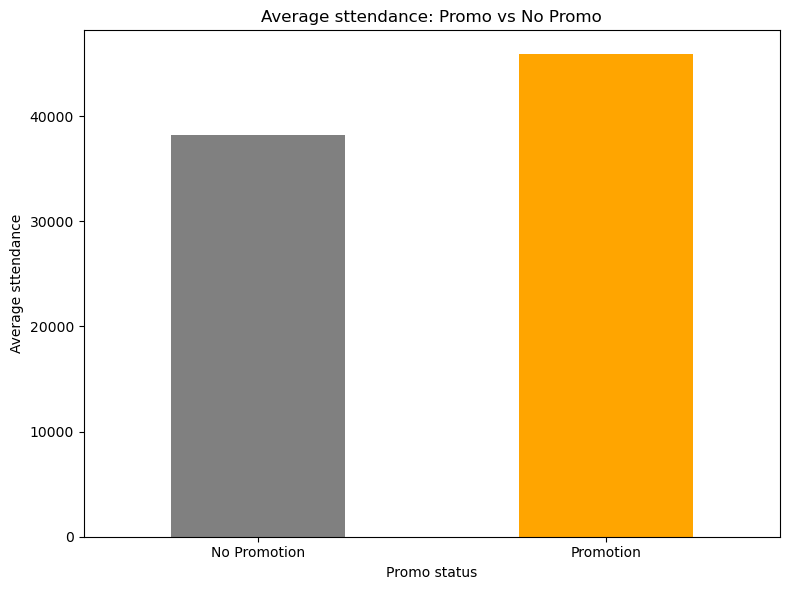

In [63]:
# plot the data 

plt.figure(figsize=(8, 6))
avg_attend_by_promo_status.plot(kind='bar', color=['gray', 'orange'])
plt.title("Average sttendance: Promo vs No Promo")
plt.ylabel('Average sttendance')
plt.xlabel('Promo status')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Graph the data to understand the attendance relationship between the promotions

Text(0.5, 0, 'Promo type')

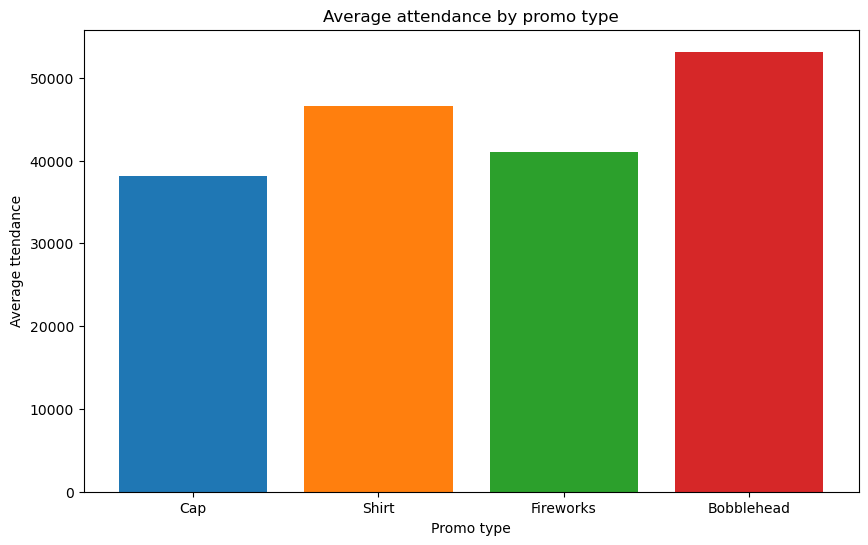

In [64]:
# plot to compare promotions

promotions = ['cap', 'shirt', 'fireworks', 'bobblehead']

plt.figure(figsize=(10, 6))
for promo in promotions:
    avg_attend_by_promo = dodgers_df.groupby(promo)['attend'].mean()
    plt.bar(promo.capitalize(), avg_attend_by_promo['YES'], label=f'{promo.capitalize()} Promotion')

plt.title("Average attendance by promo type")
plt.ylabel('Average ttendance')
plt.xlabel('Promo type')

#### Graph the data to understand the attendance between the day and night games

Text(0.5, 0, 'Game time')

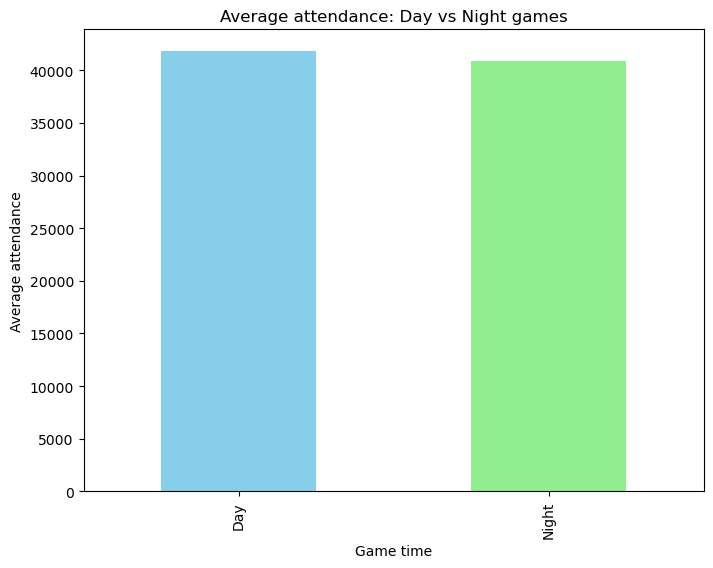

In [65]:
# attendance compare for day and night games

plt.figure(figsize=(8, 6))
dodgers_df.groupby('day_night')['attend'].mean().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Average attendance: Day vs Night games")
plt.ylabel('Average attendance')
plt.xlabel('Game time')

#### Graph the data to understand the attendance by temperature range

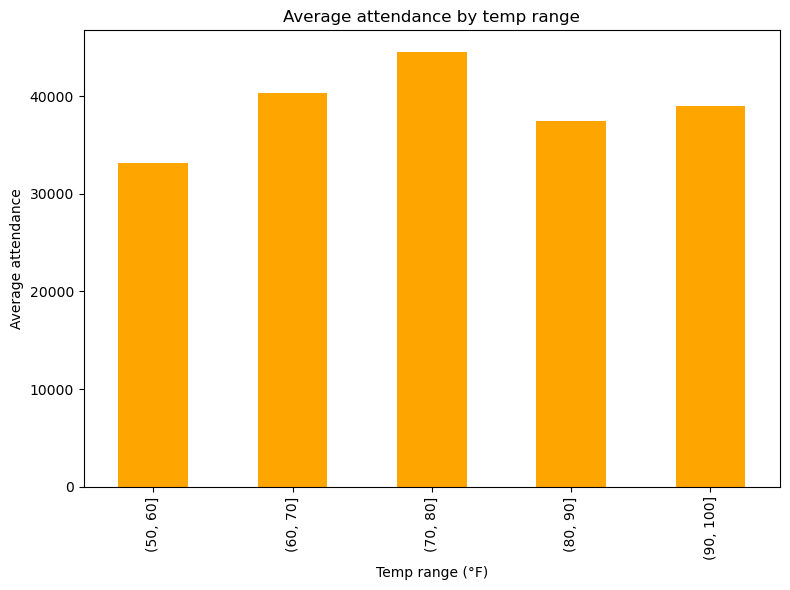

In [66]:
# temp analyze trends by temp range

bins = [50, 60, 70, 80, 90, 100]  # buckets to hold ranges

dodgers_df['temp_bin'] = pd.cut(dodgers_df['temp'], bins) # group the temp values into bins
plt.figure(figsize=(8, 6))
dodgers_df.groupby('temp_bin', observed=True)['attend'].mean().plot(kind='bar', color='orange') # group the new temp_bin into temp values into bins
plt.title("Average attendance by temp range")
plt.ylabel('Average attendance')
plt.xlabel('Temp range (°F)')

plt.tight_layout()
plt.show()

#### Plot the data to understand the attendance by day of the week

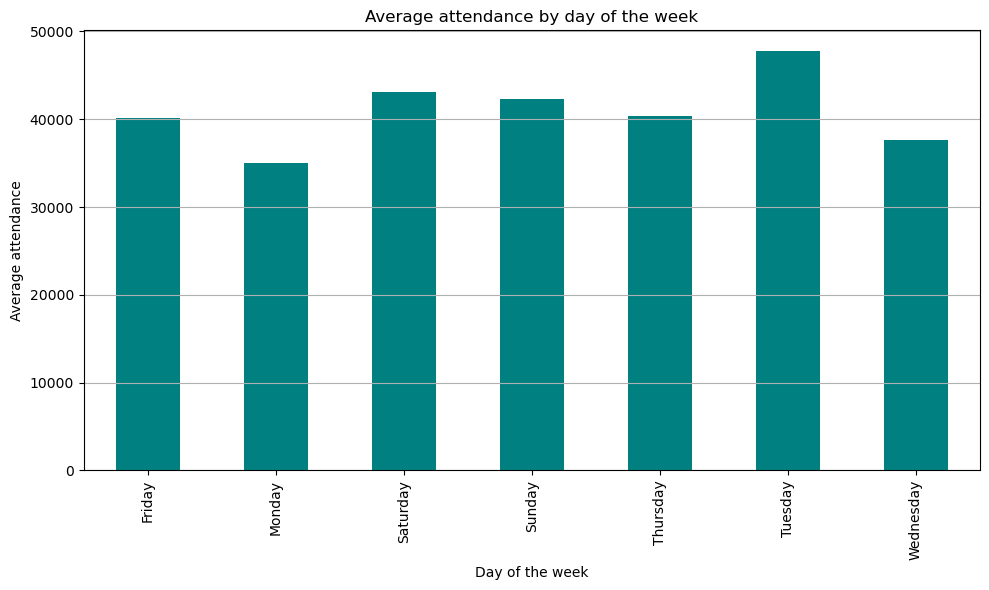

In [67]:
# day of the week and avg attendance for each day

attendance_by_day = dodgers_df.groupby('day_of_week')['attend'].mean()

# avg attendance by day of the week

plt.figure(figsize=(10, 6))
attendance_by_day.plot(kind='bar', color='teal')
plt.title('Average attendance by day of the week')
plt.ylabel('Average attendance')
plt.xlabel('Day of the week')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Recommendations

The following are a few of the recommendations that may help increase attendance at games:

1. Increase the Frequency of Promotions
Promotions Impact Attendance: Games with promotions (such as cap or shirt giveaways, bobbleheads, or fireworks) had noticeably higher attendance than games without promotions.
Recommendation: Schedule more promotional events, especially for games expected to have lower attendance (e.g., weekday games). Promotions could be diversified or new ideas introduced to maintain fan interest, such as theme nights or special merchandise giveaways.

2. Schedule More Weekend Games
Day of the Week Matters: The analysis of attendance by day of the week shows that attendance tends to be higher on weekends. People generally have more free time on weekends and are more likely to attend games.
Recommendation: Where possible, schedule more games on Fridays, Saturdays, and Sundays to take advantage of higher weekend attendance. For weekday games, consider pairing them with popular promotions.

3. Leverage the Weather
Moderate Weather Attracts Fans: Attendance tends to be higher when temperatures peak around 70-80°F. Extreme heat or cold may deter fans from attending.
Recommendation: If feasible, schedule more games in favorable weather conditions (early evening during hot months). In cases where weather is less ideal, consider offering discounts or additional perks.